In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from string import punctuation
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
printable_words = set(string.printable)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
dataset = pd.read_excel("News_Categories.xlsx", index_col=0)
dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)

In [9]:
dataset

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
148965,TECH,Good Games -- Is It possible?,"Mateo Gutierrez, Contributor\nArtist",https://www.huffingtonpost.com/entry/games-for...,I don't think people who play Zynga games are ...,2012-01-28
148966,TECH,Google+ Now Open for Teens With Some Safeguards,"Larry Magid, Contributor\nTechnology journalist",https://www.huffingtonpost.com/entry/google-pl...,"For the most part, teens' experience on Google...",2012-01-28
148967,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28
148968,TECH,Watch The Top 9 YouTube Videos Of The Week,Catharine Smith,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...,2012-01-28


C:\Users\theno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

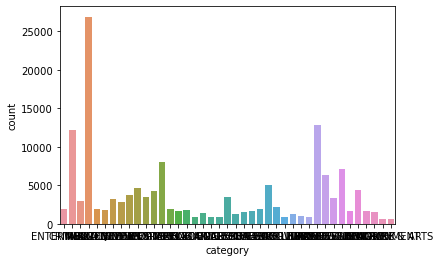

In [3]:
sns.countplot(dataset["category"])

In [4]:
dataset["combined_data"] = dataset["headline"].astype(str) + ". " + dataset["short_description"].astype(str)
dataset["combined_data"] = dataset["combined_data"].astype(str)
dataset = dataset.drop(["authors", "link", "date", "headline", "short_description"], axis=1)

In [5]:
label_data = dataset.groupby("category")
new_data = label_data.apply(lambda x: x.sample(n=4000, replace=True, random_state=0)).reset_index(drop=True)

C:\Users\theno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category', ylabel='count'>

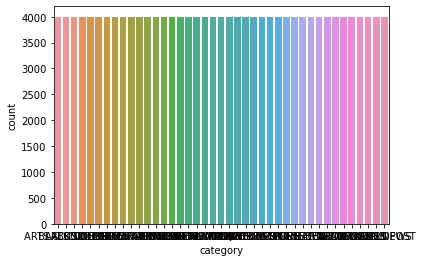

In [6]:
sns.countplot(new_data["category"])

In [10]:
new_data

,category,combined_data
0,ARTS,NYC Photographer Leverages Instagram to Plot t...
1,ARTS,Master Class. Steven Assael said always to con...
2,ARTS,Remembering 9/11: The Story Behind Chi Modu's ...
3,ARTS,First Nighter: Trash Cuisine Scrutinizes Man's...
4,ARTS,The Inconvenient Music -- Invisible and Unhear...
...,...,...
163995,WORLDPOST,'Middle East Peace Process?' High Time for a N...
163996,WORLDPOST,The United States Must Take the Initiative to ...
163997,WORLDPOST,China Needs a Strong Leader Like Xi -- but the...
163998,WORLDPOST,"Je Suis: Jewish, and So much Else. Violence ca..."


In [11]:
# Let's pre-process our text by converting it all to lowercase, removing punctuations and extra spaces.

def pre_process_text(text):
    # Convert text to lower case
    # Remove punctuation marks using Regular Expression (re)
    # Remove extra spaces
    processed_text = text.lower()
    processed_text =  re.sub(f"[{re.escape(punctuation)}]", "", processed_text)
    processed_text = " ".join(processed_text.split())
    return processed_text

In [12]:
def stemming(text):
    
    tokens = word_tokenize(text)

    ps = PorterStemmer()
    required_words = [ps.stem(x) for x in tokens ]

    sentence_with_stemmed_words = ' '.join(required_words)

    return sentence_with_stemmed_words

In [13]:
def lemmatization(text):
    
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence_with_lemmnatized_word = ''.join([wordnet_lemmatizer.lemmatize(x) for x in  text])
    
    return sentence_with_lemmnatized_word
    


In [14]:
def get_stop_words():
    
    return set(stopwords.words('english'))
    
    
def remove_stop_words(text):
    stop_words = get_stop_words()
    tokens = word_tokenize(text)
    filtered_words = [x for x in tokens if x not in stop_words]
    sentences_without_stop_words = " ".join(filtered_words)
    return sentences_without_stop_words

In [15]:
printable_words = set(string.printable)

def remove_wrong_characters(text):
    stop_words = printable_words
    tokens = word_tokenize(text)
    filtered_words = [x for x in tokens if x in stop_words]
    sentences_without_stop_words = " ".join(filtered_words)
    return sentences_without_stop_words

In [16]:
def prepare_data(text):
    text = remove_stop_words(text)
    text = pre_process_text(text)
    text = stemming(text)
    text = lemmatization(text)
    
    return text
new_data["combined_data"] = new_data["combined_data"].apply(lambda x: prepare_data(x))

In [17]:
new_data

,category,combined_data
0,ARTS,nyc photograph leverag instagram plot futur ma...
1,ARTS,master class steven assael said alway consid i...
2,ARTS,rememb 911 the stori behind chi modu s tower t...
3,ARTS,first nighter trash cuisin scrutin man s inhum...
4,ARTS,the inconveni music invis unhear we might also...
...,...,...
163995,WORLDPOST,middl east peac process high time new name it ...
163996,WORLDPOST,the unit state must take initi forg accord mid...
163997,WORLDPOST,china need strong leader like xi rule law like...
163998,WORLDPOST,je sui jewish so much els violenc seem like so...


In [54]:
#new_data.to_csv("processed_data3.csv", index=False)

In [60]:
le = LabelEncoder()
ytf = le.fit_transform(new_data["category"].values)

Xtf = new_data["combined_data"]

Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(Xtf, ytf, test_size=0.3, random_state=0)

In [56]:
tfidf = TfidfVectorizer()
transformed = tfidf.fit_transform(Xtf_train)

test_transformed = tfidf.transform(Xtf_test)
#print(vectorizer.get_feature_names())

In [57]:
clf = MultinomialNB().fit(transformed, ytf_train)

predictionstfGB = clf.predict(test_transformed)

print(classification_report(ytf_test, predictionstfGB, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.80      0.88      0.84      1501
ARTS & CULTURE       0.87      0.75      0.81      1475
  BLACK VOICES       0.68      0.53      0.60      1426
      BUSINESS       0.65      0.48      0.55      1513
       COLLEGE       0.78      0.83      0.81      1477
        COMEDY       0.68      0.59      0.63      1470
         CRIME       0.70      0.81      0.75      1562
CULTURE & ARTS       0.93      0.87      0.90      1467
       DIVORCE       0.73      0.88      0.80      1494
     EDUCATION       0.75      0.86      0.80      1503
 ENTERTAINMENT       0.65      0.48      0.55      1497
   ENVIRONMENT       0.82      0.88      0.85      1510
         FIFTY       0.38      0.88      0.53      1432
  FOOD & DRINK       0.72      0.64      0.68      1501
     GOOD NEWS       0.74      0.77      0.75      1496
         GREEN       0.71      0.73      0.72      1536
HEALTHY LIVING       0.51      0.44      0.48  

In [58]:
clasifierKNN = KNeighborsClassifier()
modelKNN = clasifierKNN.fit(transformed,ytf_train)
predictionsKNN = modelKNN.predict(test_transformed)

print(classification_report(ytf_test, predictionsKNN, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.80      0.91      0.85      1501
ARTS & CULTURE       0.68      0.76      0.72      1475
  BLACK VOICES       0.49      0.57      0.53      1426
      BUSINESS       0.44      0.44      0.44      1513
       COLLEGE       0.70      0.92      0.79      1477
        COMEDY       0.46      0.51      0.48      1470
         CRIME       0.69      0.67      0.68      1562
CULTURE & ARTS       0.82      0.95      0.88      1467
       DIVORCE       0.59      0.84      0.70      1494
     EDUCATION       0.70      0.89      0.78      1503
 ENTERTAINMENT       0.51      0.33      0.40      1497
   ENVIRONMENT       0.74      0.93      0.82      1510
         FIFTY       0.66      0.84      0.74      1432
  FOOD & DRINK       0.48      0.57      0.52      1501
     GOOD NEWS       0.72      0.88      0.79      1496
         GREEN       0.64      0.66      0.65      1536
HEALTHY LIVING       0.41      0.38      0.39  

In [59]:
modelRFC = RandomForestClassifier(max_depth = 60, random_state=0)
modelRFC.fit(transformed,ytf_train)
predictionsRFC = modelRFC.predict(test_transformed)

print(classification_report(ytf_test, predictionsRFC, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.84      0.93      0.88      1501
ARTS & CULTURE       0.80      0.83      0.82      1475
  BLACK VOICES       0.78      0.55      0.65      1426
      BUSINESS       0.66      0.48      0.56      1513
       COLLEGE       0.83      0.93      0.88      1477
        COMEDY       0.80      0.61      0.69      1470
         CRIME       0.69      0.85      0.76      1562
CULTURE & ARTS       0.94      0.96      0.95      1467
       DIVORCE       0.90      0.91      0.91      1494
     EDUCATION       0.75      0.95      0.84      1503
 ENTERTAINMENT       0.45      0.33      0.38      1497
   ENVIRONMENT       0.91      0.93      0.92      1510
         FIFTY       0.76      0.89      0.82      1432
  FOOD & DRINK       0.67      0.73      0.70      1501
     GOOD NEWS       0.79      0.90      0.84      1496
         GREEN       0.80      0.81      0.80      1536
HEALTHY LIVING       0.66      0.44      0.53  

In [92]:
vectorizer = HashingVectorizer(alternate_sign=False)
X = vectorizer.fit_transform(new_data["combined_data"])
#X = X.toarray()

X_train, X_test, y_train, y_test = train_test_split(X, ytf, test_size=0.3, random_state=0)

In [93]:
X_train

<114800x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 2363361 stored elements in Compressed Sparse Row format>

In [95]:
modelNB = MultinomialNB().fit(X_train, y_train)

predictionsGB = modelNB.predict(X_test)

print(classification_report(y_test, predictionsGB, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.69      0.81      0.74      1191
ARTS & CULTURE       0.82      0.61      0.70      1229
  BLACK VOICES       0.65      0.44      0.52      1196
      BUSINESS       0.49      0.44      0.46      1119
       COLLEGE       0.73      0.65      0.69      1229
        COMEDY       0.62      0.56      0.59      1147
         CRIME       0.59      0.77      0.67      1194
CULTURE & ARTS       0.89      0.77      0.82      1179
       DIVORCE       0.80      0.78      0.79      1242
     EDUCATION       0.67      0.82      0.74      1180
 ENTERTAINMENT       0.59      0.42      0.49      1188
   ENVIRONMENT       0.79      0.72      0.75      1222
         FIFTY       0.22      0.86      0.35      1171
  FOOD & DRINK       0.69      0.58      0.63      1175
     GOOD NEWS       0.66      0.65      0.66      1188
         GREEN       0.62      0.67      0.64      1174
HEALTHY LIVING       0.52      0.33      0.40  

In [96]:
clasifierHKNN = KNeighborsClassifier()
modelHKNN = clasifierHKNN.fit(X_train,y_train)
predictionsHKNN = modelHKNN.predict(X_test)

print(classification_report(y_test, predictionsHKNN, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.76      0.84      0.79      1191
ARTS & CULTURE       0.54      0.69      0.61      1229
  BLACK VOICES       0.44      0.47      0.45      1196
      BUSINESS       0.36      0.37      0.36      1119
       COLLEGE       0.64      0.84      0.72      1229
        COMEDY       0.37      0.48      0.42      1147
         CRIME       0.58      0.63      0.61      1194
CULTURE & ARTS       0.83      0.90      0.86      1179
       DIVORCE       0.53      0.76      0.63      1242
     EDUCATION       0.64      0.85      0.73      1180
 ENTERTAINMENT       0.36      0.24      0.29      1188
   ENVIRONMENT       0.74      0.91      0.82      1222
         FIFTY       0.56      0.77      0.65      1171
  FOOD & DRINK       0.47      0.50      0.48      1175
     GOOD NEWS       0.59      0.75      0.66      1188
         GREEN       0.56      0.58      0.57      1174
HEALTHY LIVING       0.32      0.30      0.31  

In [104]:
modelHRFC = RandomForestClassifier(max_depth = 60, random_state=0)
modelHRFC.fit(X_train,y_train)
predictionsHRFC = modelHRFC.predict(X_test)

print(classification_report(y_test, predictionsHRFC, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.83      0.91      0.87      1191
ARTS & CULTURE       0.85      0.82      0.84      1229
  BLACK VOICES       0.77      0.59      0.66      1196
      BUSINESS       0.64      0.53      0.58      1119
       COLLEGE       0.79      0.93      0.86      1229
        COMEDY       0.68      0.66      0.67      1147
         CRIME       0.63      0.89      0.74      1194
CULTURE & ARTS       0.90      0.94      0.92      1179
       DIVORCE       0.80      0.89      0.84      1242
     EDUCATION       0.79      0.94      0.86      1180
 ENTERTAINMENT       0.61      0.38      0.47      1188
   ENVIRONMENT       0.89      0.97      0.93      1222
         FIFTY       0.73      0.91      0.81      1171
  FOOD & DRINK       0.64      0.70      0.67      1175
     GOOD NEWS       0.82      0.85      0.84      1188
         GREEN       0.79      0.83      0.81      1174
HEALTHY LIVING       0.69      0.43      0.53  

In [109]:
Cvectorizer = CountVectorizer(ngram_range=(1,1))
XC = Cvectorizer.fit_transform(new_data["combined_data"])

XC_train, XC_test, yC_train, yC_test = train_test_split(XC, ytf, test_size=0.3, random_state=0)

In [110]:
modelCNB = MultinomialNB().fit(XC_train, yC_train)

predictionsCGB = modelCNB.predict(XC_test)

print(classification_report(yC_test, predictionsCGB, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.81      0.86      0.83      1191
ARTS & CULTURE       0.85      0.71      0.77      1229
  BLACK VOICES       0.65      0.50      0.57      1196
      BUSINESS       0.56      0.49      0.52      1119
       COLLEGE       0.77      0.75      0.76      1229
        COMEDY       0.67      0.60      0.64      1147
         CRIME       0.67      0.81      0.74      1194
CULTURE & ARTS       0.91      0.90      0.90      1179
       DIVORCE       0.79      0.83      0.81      1242
     EDUCATION       0.74      0.85      0.79      1180
 ENTERTAINMENT       0.62      0.51      0.56      1188
   ENVIRONMENT       0.85      0.84      0.84      1222
         FIFTY       0.36      0.85      0.51      1171
  FOOD & DRINK       0.72      0.65      0.68      1175
     GOOD NEWS       0.75      0.72      0.74      1188
         GREEN       0.68      0.75      0.71      1174
HEALTHY LIVING       0.52      0.38      0.44  

In [111]:
clasifierCKNN = KNeighborsClassifier()
modelCKNN = clasifierCKNN.fit(XC_train,yC_train)
predictionsCKNN = modelCKNN.predict(XC_test)

print(classification_report(yC_test, predictionsCKNN, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.99      0.81      0.89      1191
ARTS & CULTURE       0.68      0.63      0.65      1229
  BLACK VOICES       0.57      0.29      0.38      1196
      BUSINESS       0.56      0.23      0.33      1119
       COLLEGE       0.71      0.82      0.76      1229
        COMEDY       0.10      0.51      0.17      1147
         CRIME       0.81      0.41      0.54      1194
CULTURE & ARTS       0.84      0.91      0.87      1179
       DIVORCE       0.82      0.57      0.67      1242
     EDUCATION       0.92      0.79      0.85      1180
 ENTERTAINMENT       0.39      0.09      0.15      1188
   ENVIRONMENT       0.97      0.89      0.93      1222
         FIFTY       0.90      0.71      0.80      1171
  FOOD & DRINK       0.19      0.31      0.24      1175
     GOOD NEWS       0.79      0.71      0.75      1188
         GREEN       0.87      0.45      0.59      1174
HEALTHY LIVING       0.19      0.24      0.21  

In [112]:
modelCRFC = RandomForestClassifier(max_depth = 60, random_state=0)
modelCRFC.fit(XC_train,yC_train)
predictionsCRFC = modelCRFC.predict(XC_test)

print(classification_report(yC_test, predictionsCRFC, target_names = le.classes_))

                precision    recall  f1-score   support

          ARTS       0.84      0.90      0.87      1191
ARTS & CULTURE       0.77      0.76      0.76      1229
  BLACK VOICES       0.74      0.56      0.64      1196
      BUSINESS       0.60      0.50      0.55      1119
       COLLEGE       0.77      0.92      0.84      1229
        COMEDY       0.74      0.60      0.66      1147
         CRIME       0.65      0.85      0.74      1194
CULTURE & ARTS       0.94      0.95      0.94      1179
       DIVORCE       0.85      0.86      0.85      1242
     EDUCATION       0.74      0.94      0.83      1180
 ENTERTAINMENT       0.37      0.36      0.37      1188
   ENVIRONMENT       0.92      0.95      0.93      1222
         FIFTY       0.82      0.91      0.86      1171
  FOOD & DRINK       0.59      0.71      0.64      1175
     GOOD NEWS       0.81      0.78      0.79      1188
         GREEN       0.75      0.76      0.75      1174
HEALTHY LIVING       0.56      0.43      0.49  